Análise de desempenho com base no sexo do concorrente.

Fazendo o cruzamento entre algumas variáveis em função do sexo declarado pelo concorrente, podemos observar que, de forma geral o desempenho dos concorrentes do sexo feminino obtiveram na maioria dos casos, desempenho ligeiramente menor que os do sexo masculino. Com base em pesquisas de dados estatísticos levantados em alguns estudos acadêmicos e pesquisas populacionais, podemos interpretar essa diferença como uma consequência do tempo empregado em tarefas domésticas pelas mulheres ser maior que o tempo gasto pelos homens na mesma tarefa. Abaixo seguem fontes dos referidos dados:

https://jornal.usp.br/ciencias/ciencias-humanas/trabalho-infantil-provoca-significativas-quedas-no-desempenho-escolar/#:~:text=%E2%80%9CNa%20an%C3%A1lise%2C%20monitorando%20diversos%20fatores,sobrecarregadas%E2%80%9D%2C%20ressaltou%20a%20professora.

https://www12.senado.leg.br/noticias/especiais/especial-cidadania/divisao-de-tarefas-domesticas-ainda-e-desigual-no-brasil/divisao-de-tarefas-domesticas-ainda-e-desigual-no-brasil

https://oglobo.globo.com/brasil/especialistas-analisam-estudo-sobre-distribuicao-desigual-de-tarefas-do-lar-20258384

https://www.trt5.jus.br/noticias/trabalho-domestico-infantil-atrapalha-rendimento-escolar-diz-estudo-usp

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df_enem_2022 = pd.read_csv('../../data/enem_2022_v2.csv') #Geração do dataframe referente aos dados dos concorrentes do ENEM de 2022


In [4]:
df_enem_2022.head()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,Q002,Q003,Q004,Q005,Q006,Q008,Q010,Q022,Q024,Q025
0,2022,14,M,2,2,1,1,2,1,0,...,A,A,B,3,B,B,B,A,A,A
1,2022,14,M,2,1,1,1,16,1,0,...,D,E,E,3,Q,E,E,E,E,B
2,2022,5,F,1,2,1,1,2,1,0,...,F,A,D,2,B,B,A,C,A,B
3,2022,6,M,1,3,1,1,2,1,0,...,A,A,B,3,A,C,A,C,B,B
4,2022,4,M,0,3,1,1,1,1,0,...,B,A,B,2,B,B,A,B,A,A


In [5]:
df_enem_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_ANO                  int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   TP_ESTADO_CIVIL         int64  
 4   TP_COR_RACA             int64  
 5   TP_NACIONALIDADE        int64  
 6   TP_ST_CONCLUSAO         int64  
 7   TP_ANO_CONCLUIU         int64  
 8   TP_ESCOLA               int64  
 9   IN_TREINEIRO            int64  
 10  NO_MUNICIPIO_ESC        object 
 11  SG_UF_ESC               object 
 12  TP_DEPENDENCIA_ADM_ESC  float64
 13  TP_LOCALIZACAO_ESC      float64
 14  TP_PRESENCA_CN          int64  
 15  TP_PRESENCA_CH          int64  
 16  TP_PRESENCA_LC          int64  
 17  TP_PRESENCA_MT          int64  
 18  NU_NOTA_CN              float64
 19  NU_NOTA_CH              float64
 20  NU_NOTA_LC              float64
 21  NU_NOTA_MT              float64

In [6]:
df_enem_2022.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005
count,3476105.0,3.476105e+06,3.476105e+06,3.476105e+06,3.476105e+06,3.476105e+06,3.476105e+06,3.476105e+06,3.476105e+06,951944.000000,...,3.476105e+06,3.476105e+06,3.476105e+06,2.355395e+06,2.493442e+06,2.493442e+06,2.355395e+06,2.493442e+06,2.493442e+06,3.476105e+06
mean,2022.0,4.863503e+00,1.042771e+00,2.035284e+00,1.028641e+00,1.684877e+00,2.178502e+00,1.440080e+00,1.475019e-01,2.435363,...,7.200030e-01,7.200030e-01,6.785034e-01,4.959305e+02,5.269531e+02,5.174389e+02,5.425032e+02,1.188712e+00,6.184797e+02,3.745322e+00
std,0.0,3.690560e+00,3.873107e-01,1.019759e+00,2.102919e-01,7.297286e-01,4.064238e+00,6.070447e-01,3.546056e-01,0.909683,...,4.519873e-01,4.519873e-01,4.680213e-01,7.200975e+01,8.148446e+01,7.755491e+01,1.160225e+02,8.793775e-01,2.122125e+02,1.376848e+00
min,2022.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2022.0,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,4.405000e+02,4.770000e+02,4.684000e+02,4.490000e+02,1.000000e+00,5.200000e+02,3.000000e+00
50%,2022.0,3.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,4.856000e+02,5.299000e+02,5.255000e+02,5.308000e+02,1.000000e+00,6.200000e+02,4.000000e+00
75%,2022.0,6.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,2.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,5.433000e+02,5.819000e+02,5.732000e+02,6.224000e+02,1.000000e+00,7.600000e+02,4.000000e+00
max,2022.0,2.000000e+01,4.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,1.600000e+01,3.000000e+00,1.000000e+00,4.000000,...,2.000000e+00,2.000000e+00,2.000000e+00,8.753000e+02,8.392000e+02,8.010000e+02,9.857000e+02,9.000000e+00,1.000000e+03,2.000000e+01


In [7]:
df_enem_2022.columns

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q008', 'Q010', 'Q022', 'Q024', 'Q025'],
      dtype='object')

In [8]:
# Renomeia algumas colunas da tabela para melhor visualização
df_enem_2022.rename(columns={   
    'NU_ANO': 'ANO', 'TP_FAIXA_ETARIA': 'FAIXA_ETARIA', 'TP_SEXO': 'SEXO', 
    'TP_ESTADO_CIVIL': 'ESTADO_CIVIL', 'SG_UF_ESC': 'UF_ESC', 'TP_PRESENCA_CN': 'PRESENCA_CN',
    'TP_PRESENCA_CH': 'PRESENCA_CH', 'TP_PRESENCA_LC': 'PRESENCA_LC', 'TP_PRESENCA_MT': 'PRESENCA_MT',
    'NU_NOTA_CN': 'NOTA_CN','NU_NOTA_CH': 'NOTA_CH', 'NU_NOTA_LC': 'NOTA_LC', 'NU_NOTA_MT': 'NOTA_MT',
    'NU_NOTA_REDACAO': 'NOTA_REDACAO'
    }, inplace=True)
df_enem_2022.columns

Index(['ANO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'PRESENCA_CN', 'PRESENCA_CH', 'PRESENCA_LC',
       'PRESENCA_MT', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT',
       'TP_STATUS_REDACAO', 'NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q008', 'Q010', 'Q022', 'Q024', 'Q025'],
      dtype='object')

In [9]:
columns = ['FAIXA_ETARIA','SEXO','UF_ESC','PRESENCA_CN', 'PRESENCA_CH', 'PRESENCA_LC',
       'PRESENCA_MT', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_REDACAO']
df_enem_2022_filtrado = df_enem_2022[columns] 

# Altera na tabela os valores referentes às faixas etarias, antes indicada por códigos.
cod_faixa_etaria = {1:'14-17',2:'17',3:'18',4:'19',5:'20',6:'21',7:'22',8:'23',9:'24',10:'25',
11:'26-30',12:'31-35',13:'36-40',14:'41-45',15:'46-50',16:'51-55',17:'56-60',18:'61-65',19:'66-70',20:'>70'}
df_enem_2022_filtrado['FAIXA_ETARIA'] = df_enem_2022_filtrado['FAIXA_ETARIA'].map(cod_faixa_etaria)
df_enem_2022_filtrado

/tmp/ipykernel_39493/1457528173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enem_2022_filtrado['FAIXA_ETARIA'] = df_enem_2022_filtrado['FAIXA_ETARIA'].map(cod_faixa_etaria)


,FAIXA_ETARIA,SEXO,UF_ESC,PRESENCA_CN,PRESENCA_CH,PRESENCA_LC,PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO
0,41-45,M,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,41-45,M,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,20,F,NaN,1,1,1,1,421.1,546.0,498.8,565.3,760.0
3,21,M,NaN,1,1,1,1,490.7,388.6,357.8,416.0,320.0
4,19,M,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,18,M,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3476101,41-45,F,PE,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3476102,17,M,SC,1,1,1,1,527.9,627.0,583.3,637.1,660.0
3476103,18,M,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [10]:
df_enem_2022_sem_ausentes = df_enem_2022_filtrado.dropna(subset=['PRESENCA_CN','PRESENCA_CH','PRESENCA_LC','PRESENCA_MT','NOTA_REDACAO'])
df_enem_2022_sem_ausentes # TABELA ONDE CONSTAM APENAS DADOS DOS CONCORRENTES QUE REALIZARAM AS PROVAS

,FAIXA_ETARIA,SEXO,UF_ESC,PRESENCA_CN,PRESENCA_CH,PRESENCA_LC,PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO
2,20,F,NaN,1,1,1,1,421.1,546.0,498.8,565.3,760.0
3,21,M,NaN,1,1,1,1,490.7,388.6,357.8,416.0,320.0
7,21,F,NaN,1,1,1,1,398.1,427.3,400.2,404.9,440.0
9,19,F,NaN,1,1,1,1,467.5,461.0,466.7,435.3,360.0
11,17,F,NaN,1,1,1,1,458.7,539.8,488.2,456.8,940.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3476095,31-35,M,NaN,1,1,1,1,444.5,504.4,489.5,423.6,580.0
3476097,26-30,F,NaN,1,1,1,1,536.1,633.2,584.0,596.3,740.0
3476098,17,M,MG,1,1,1,1,487.6,495.6,545.5,597.4,580.0
3476099,26-30,F,NaN,1,1,1,1,512.5,524.8,546.8,432.0,520.0


In [11]:
grupo_faixa_etaria = df_enem_2022_sem_ausentes.groupby('FAIXA_ETARIA')['NOTA_REDACAO'].mean()
grupo_faixa_etaria

FAIXA_ETARIA
14-17    641.826336
17       638.074090
18       622.497402
19       622.182704
20       623.864441
21       623.769297
22       619.006633
23       608.832076
24       597.879268
25       587.683955
26-30    569.283824
31-35    543.313598
36-40    514.545016
41-45    492.684168
46-50    480.226998
51-55    476.102339
56-60    465.710119
61-65    446.026044
66-70    433.021182
>70      408.352941
Name: NOTA_REDACAO, dtype: float64

Text(0.5, 1.0, 'Média das notas da redação por faixa etária')

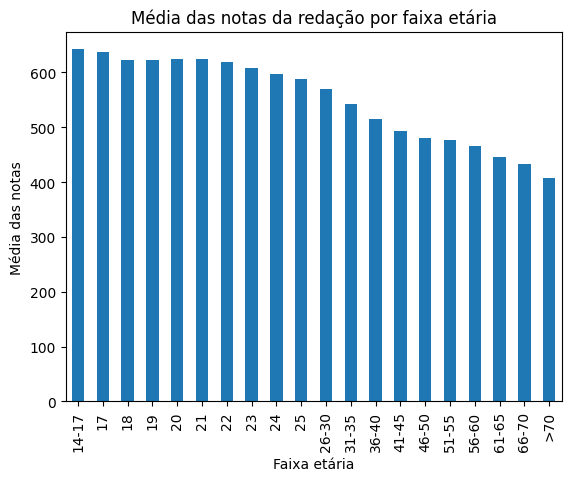

In [12]:
grupo_faixa_etaria.plot(kind='bar')
plt.xlabel('Faixa etária')
plt.ylabel('Média das notas')
plt.title('Média das notas da redação por faixa etária')

In [13]:
grupo_estado = df_enem_2022_sem_ausentes.groupby('UF_ESC')['NOTA_REDACAO'].mean()
grupo_estado

UF_ESC
AC    593.836127
AL    609.239389
AM    521.846835
AP    582.108355
BA    628.588676
CE    541.267488
DF    646.072515
ES    652.802875
GO    613.622994
MA    587.937786
MG    674.544022
MS    614.975884
MT    601.798085
PA    610.247442
PB    637.171435
PE    615.068036
PI    640.137921
PR    617.369006
RJ    655.652574
RN    652.192108
RO    587.738221
RR    569.231788
RS    643.409557
SC    639.478886
SE    639.220094
SP    640.755409
TO    590.537198
Name: NOTA_REDACAO, dtype: float64

Text(0.5, 1.0, 'Média das notas da redação por estado')

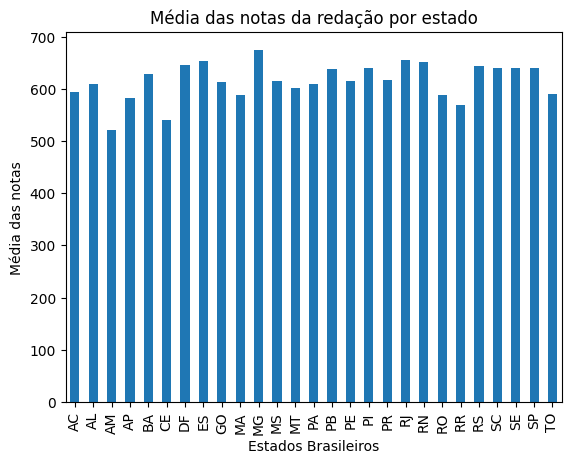

In [14]:
grupo_estado.plot(kind='bar')
plt.xlabel('Estados Brasileiros')
plt.ylabel('Média das notas')
plt.title('Média das notas da redação por estado')

In [15]:
df_enem_2022_sem_ausentes['MEDIA_NOTAS'] = df_enem_2022_sem_ausentes[['NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_REDACAO']].mean(axis=1)
df_enem_2022_sem_ausentes

/tmp/ipykernel_39493/236820058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enem_2022_sem_ausentes['MEDIA_NOTAS'] = df_enem_2022_sem_ausentes[['NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_REDACAO']].mean(axis=1)


,FAIXA_ETARIA,SEXO,UF_ESC,PRESENCA_CN,PRESENCA_CH,PRESENCA_LC,PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,MEDIA_NOTAS
2,20,F,NaN,1,1,1,1,421.1,546.0,498.8,565.3,760.0,558.24
3,21,M,NaN,1,1,1,1,490.7,388.6,357.8,416.0,320.0,394.62
7,21,F,NaN,1,1,1,1,398.1,427.3,400.2,404.9,440.0,414.10
9,19,F,NaN,1,1,1,1,467.5,461.0,466.7,435.3,360.0,438.10
11,17,F,NaN,1,1,1,1,458.7,539.8,488.2,456.8,940.0,576.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476095,31-35,M,NaN,1,1,1,1,444.5,504.4,489.5,423.6,580.0,488.40
3476097,26-30,F,NaN,1,1,1,1,536.1,633.2,584.0,596.3,740.0,617.92
3476098,17,M,MG,1,1,1,1,487.6,495.6,545.5,597.4,580.0,541.22
3476099,26-30,F,NaN,1,1,1,1,512.5,524.8,546.8,432.0,520.0,507.22


In [16]:
df_notas_genero = df_enem_2022_sem_ausentes.pivot_table(index=['FAIXA_ETARIA'], columns=['SEXO'], values=['MEDIA_NOTAS']).dropna().round(2)
df_notas_genero


MEDIA_NOTAS        
SEXO                   F       M
FAIXA_ETARIA                    
14-17             544.59  551.37
17                541.53  551.16
18                535.02  540.98
19                537.68  539.42
20                541.31  542.04
21                543.21  544.97
22                541.66  546.26
23                537.60  545.85
24                532.89  545.56
25                529.77  542.81
26-30             521.97  542.76
31-35             510.22  540.69
36-40             495.35  531.99
41-45             485.05  519.72
46-50             478.19  514.42
51-55             477.03  513.61
56-60             473.13  512.68
61-65             465.32  503.25
66-70             458.59  489.71
>70               427.22  468.55

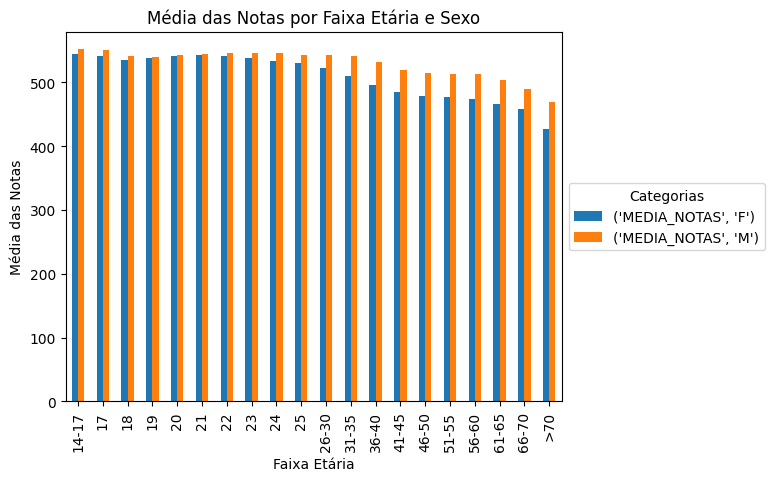

In [17]:
ax = df_notas_genero.plot(kind='bar')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Média das Notas')
ax.set_title('Média das Notas por Faixa Etária e Sexo')
ax.legend(df_notas_genero.columns, title='Categorias', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [25]:
df_notas_genero_redacao = df_enem_2022_sem_ausentes.pivot_table(index=['FAIXA_ETARIA'], columns=['SEXO'], values=['NOTA_REDACAO']).dropna().round(2)
df_notas_genero_redacao


NOTA_REDACAO        
SEXO                    F       M
FAIXA_ETARIA                     
14-17              652.15  621.78
17                 648.28  621.35
18                 635.68  602.21
19                 637.87  597.42
20                 639.02  600.65
21                 637.57  603.03
22                 629.62  603.56
23                 615.87  598.74
24                 602.12  591.81
25                 590.14  584.19
26-30              566.05  573.90
31-35              533.31  557.92
36-40              500.25  537.02
41-45              479.79  513.53
46-50              465.77  503.66
51-55              462.38  495.89
56-60              447.75  489.25
61-65              428.15  462.92
66-70              414.23  447.60
>70                374.40  428.09

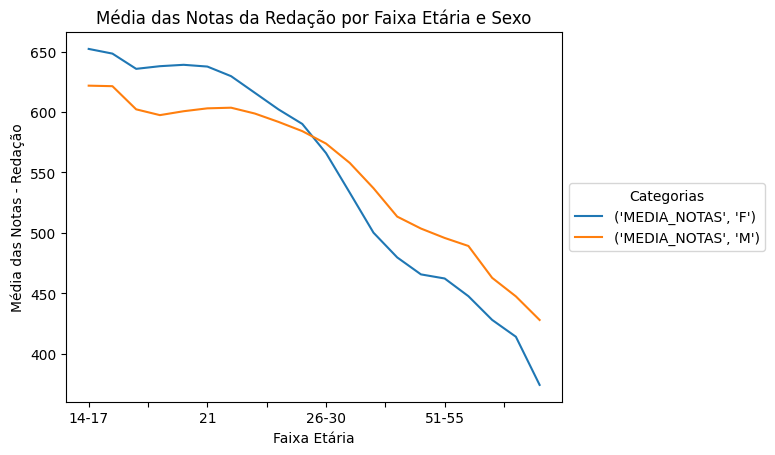

In [19]:
ax = df_notas_genero_redacao.plot(kind='line')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Média das Notas - Redação')
ax.set_title('Média das Notas da Redação por Faixa Etária e Sexo')
ax.legend(df_notas_genero.columns, title='Categorias', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [26]:
df_notas_genero_matematica = df_enem_2022_sem_ausentes.pivot_table(index=['FAIXA_ETARIA'], columns=['SEXO'], values=['NOTA_MT']).dropna().round(2)
df_notas_genero_matematica


NOTA_MT        
SEXO               F       M
FAIXA_ETARIA                
14-17         537.56  580.73
17            531.62  576.96
18            524.19  564.18
19            527.17  561.53
20            532.02  563.52
21            533.68  566.46
22            532.62  566.95
23            528.51  566.22
24            523.48  567.07
25            522.23  562.95
26-30         514.97  564.42
31-35         504.60  563.57
36-40         490.04  553.06
41-45         479.84  539.01
46-50         474.40  533.41
51-55         473.01  532.66
56-60         470.69  526.53
61-65         465.39  524.57
66-70         456.60  507.86
>70           444.57  489.13

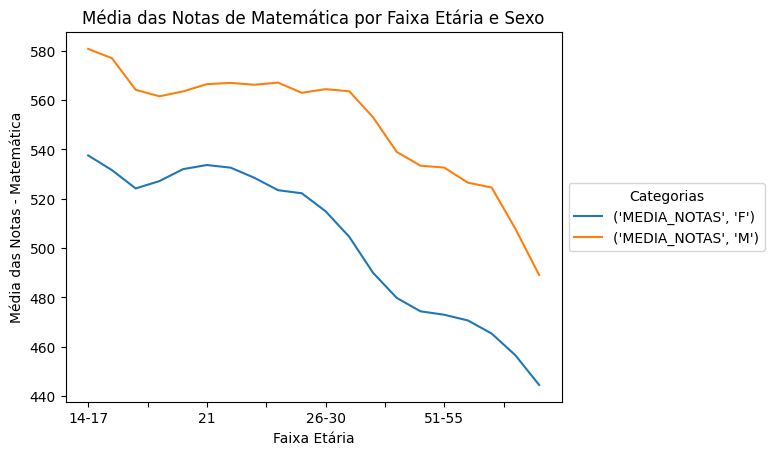

In [27]:
ax = df_notas_genero_matematica.plot(kind='line')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Média das Notas - Matemática')
ax.set_title('Média das Notas de Matemática por Faixa Etária e Sexo')
ax.legend(df_notas_genero.columns, title='Categorias', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [34]:
df_notas_genero_matematica_uf = df_enem_2022_sem_ausentes.pivot_table(index=['UF_ESC'], columns=['SEXO'], values=['NOTA_MT']).dropna().round(2)
df_notas_genero_matematica_uf


NOTA_MT        
SEXO         F       M
UF_ESC                
AC      494.88  528.72
AL      512.38  553.61
AM      482.70  509.16
AP      479.98  516.25
BA      516.70  557.43
CE      496.84  521.08
DF      539.82  586.07
ES      544.98  585.84
GO      523.51  555.15
MA      488.29  525.31
MG      565.78  609.07
MS      526.85  564.45
MT      516.24  553.58
PA      490.90  530.37
PB      512.49  553.11
PE      525.84  566.42
PI      518.17  554.90
PR      542.40  584.06
RJ      545.38  594.90
RN      528.92  569.99
RO      500.59  533.39
RR      507.79  543.35
RS      545.17  592.64
SC      552.39  597.02
SE      514.38  550.81
SP      554.17  598.09
TO      502.54  541.25

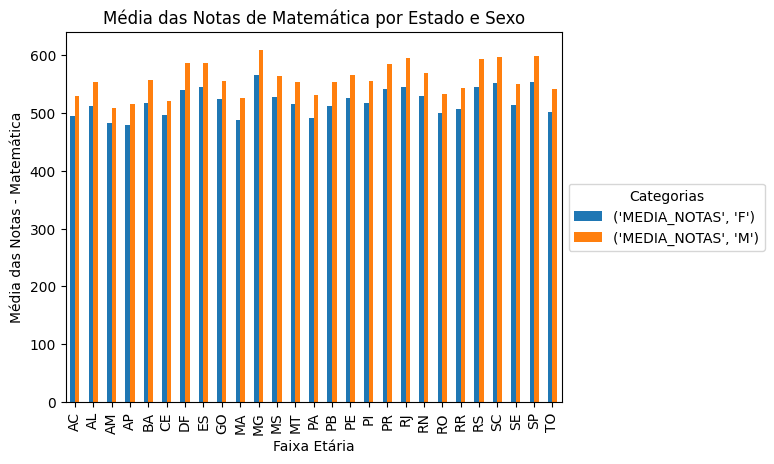

In [37]:
ax = df_notas_genero_matematica_uf.plot(kind='bar')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Média das Notas - Matemática')
ax.set_title('Média das Notas de Matemática por Estado e Sexo')
ax.legend(df_notas_genero.columns, title='Categorias', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [28]:
df_notas_genero_uf = df_enem_2022_sem_ausentes.pivot_table(index=['UF_ESC'], columns=['SEXO'], values=['MEDIA_NOTAS']).dropna().round(2)
df_notas_genero_uf


MEDIA_NOTAS        
SEXO             F       M
UF_ESC                    
AC          510.49  515.75
AL          522.34  529.69
AM          488.27  489.60
AP          504.27  510.58
BA          531.19  541.76
CE          500.38  493.09
DF          553.61  563.97
ES          551.07  559.26
GO          532.75  530.74
MA          503.55  509.80
MG          566.28  575.75
MS          533.10  538.98
MT          524.27  527.61
PA          513.35  522.07
PB          531.13  538.64
PE          531.53  536.32
PI          531.69  534.78
PR          544.96  551.44
RJ          554.53  568.15
RN          543.78  553.11
RO          512.38  514.38
RR          515.16  520.21
RS          551.45  561.26
SC          554.82  563.57
SE          532.42  537.13
SP          556.28  564.72
TO          512.14  517.63

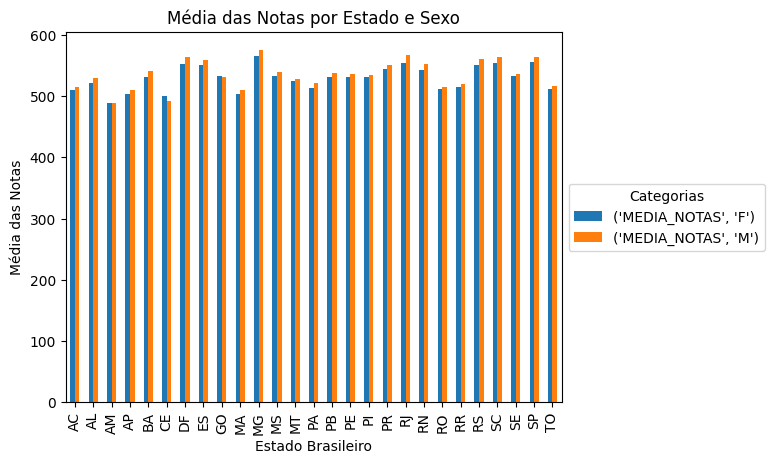

In [29]:
ax = df_notas_genero_uf.plot(kind='bar')
ax.set_xlabel('Estado Brasileiro')
ax.set_ylabel('Média das Notas')
ax.set_title('Média das Notas por Estado e Sexo')
ax.legend(df_notas_genero_uf.columns, title='Categorias', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [30]:
df_notas_genero_uf = df_enem_2022_sem_ausentes.pivot_table(index=['UF_ESC'], columns=['SEXO'], values=['NOTA_REDACAO']).dropna().round(2)
df_notas_genero_uf


NOTA_REDACAO        
SEXO              F       M
UF_ESC                     
AC           606.10  579.83
AL           622.60  591.92
AM           532.74  508.37
AP           590.62  572.25
BA           638.65  615.10
CE           567.06  512.37
DF           658.54  629.46
ES           665.97  635.68
GO           634.48  589.20
MA           598.96  572.79
MG           686.73  658.66
MS           627.71  598.73
MT           617.52  580.57
PA           619.67  598.15
PB           651.48  620.50
PE           631.33  594.48
PI           656.01  620.26
PR           632.30  597.85
RJ           664.38  643.79
RN           663.72  637.85
RO           601.75  567.39
RR           580.07  554.26
RS           655.96  625.94
SC           653.02  620.75
SE           655.80  618.31
SP           654.50  623.28
TO           602.23  574.68

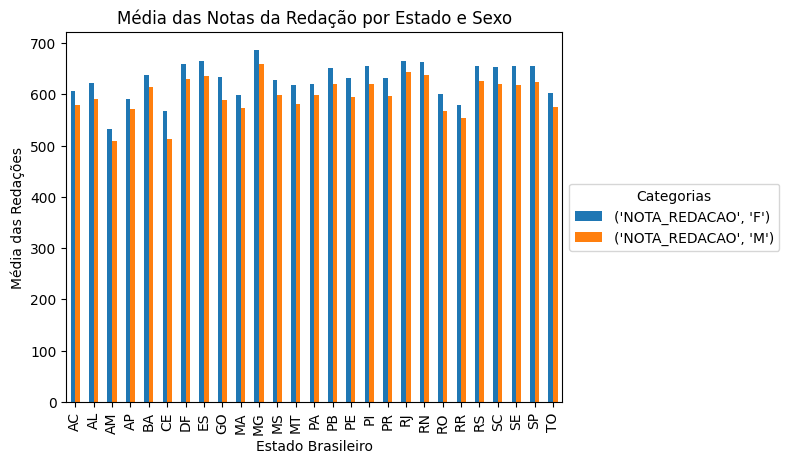

In [32]:
ax = df_notas_genero_uf.plot(kind='bar')
ax.set_xlabel('Estado Brasileiro')
ax.set_ylabel('Média das Redações')
ax.set_title('Média das Notas da Redação por Estado e Sexo')
ax.legend(df_notas_genero_uf.columns, title='Categorias', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()